<a href="https://colab.research.google.com/github/ashraf9723/Zidio-Development-Internship/blob/main/digi_rec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 61s 183ms/step - accuracy: 0.8133 - loss: 0.6314 - val_accuracy: 0.9777 - val_loss: 0.0731
Epoch 2/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 78s 172ms/step - accuracy: 0.9769 - loss: 0.0756 - val_accuracy: 0.9845 - val_loss: 0.0474
Epoch 3/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 80s 164ms/step - accuracy: 0.9839 - loss: 0.0510 - val_accuracy: 0.9877 - val_loss: 0.0384
Epoch 4/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 83s 169ms/step - accuracy: 0.9880 - loss: 0.0412 - val_accuracy: 0.9878 - val_loss: 0.0377
Epoch 5/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 81s 166ms/step - accuracy: 0.9899 - loss: 0.0322 - val_accuracy: 0.9881 - val_loss: 0.0348
Epoch 6/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 81s 163ms/step - accuracy: 0.9921 - loss: 0.0249 - val_accuracy: 0.9895 - val_loss: 0.0291
Epoch 7/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 84s 169ms/step - accuracy: 0.9937 - loss: 0.0204 - val_accuracy: 0.9894 - val_loss: 0.0335
Epoch 8/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 50s 167ms/step - accuracy: 0.9952 - loss: 0

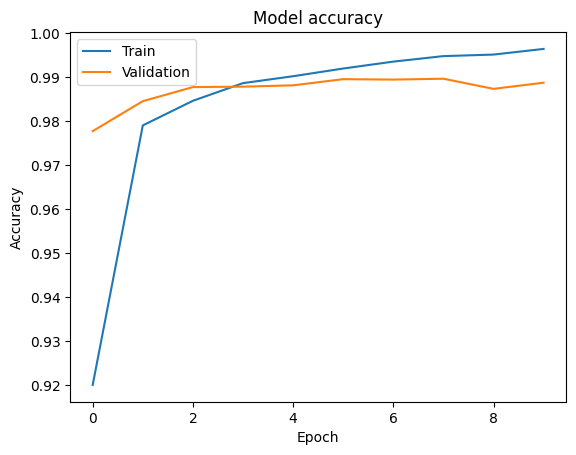

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


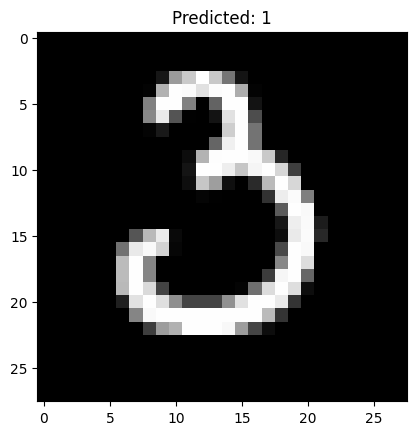

In [1]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the pixel values (0-255) to a range of 0-1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape the data to add a channel dimension (required for CNN)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Build the CNN model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=200)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc:.4f}')

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Save the model for deployment
model.save('digit_recognition_model.h5')

# Function to predict a single digit
def predict_digit(img):
    img = img.reshape(1, 28, 28, 1)
    img = img.astype('float32') / 255.0
    prediction = model.predict(img)
    return prediction.argmax()

# Example usage (Predict a random image from the test set)
import numpy as np

index = np.random.randint(0, len(x_test))
plt.imshow(x_test[index].reshape(28, 28), cmap='gray')
plt.title(f'Predicted: {predict_digit(x_test[index])}')
plt.show()
